# PMR3508 - Exercício Programa 02:
# Redes Neurais e o Dataset MNIST

Cabeçalho:
— Nome: Marcos Gabriel Barbosa do Nascimento
— NUSP: 10.266.322
— Hash: 137

📜 Descrição:
Neste exercício, você irá trabalhar com o dataset MNIST, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de Redes Neurais Artificiais (ANNs) vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

⚠️ Instruções:
— Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
— Comente seu código para facilitar a correção.
— Entregue o notebook no formato .ipynb.

✅ Tarefas:
Probabilidades de dígitos no dataset ⇒ 2 pontos
Análise Exploratória de Dados (EDA) ⇒ 2 pontos
Treinamento e teste de Modelos ⇒ 2 pontos
Comunicação de Resultados e Visualizações ⇒ 2 pontos
Publicação no Kaggle e Documentação ⇒ 2 pontos

BOA SORTE!!!


# Importação de bibliotecas e obtenção de arquivos necessários

In [1]:
#Importação de bibliotecas e obtenção de arquivos necessários

import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = '/kaggle/input/mnist-pmr-3508-137'  # Obtenção do diretório atual necessário
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

# Verificação do correto carregamento do conjunto de dados

É necessário visualizar algumas imagens do conjunto de dados MNIST para confirmar se o carregamento foi realizado de maneira correta.

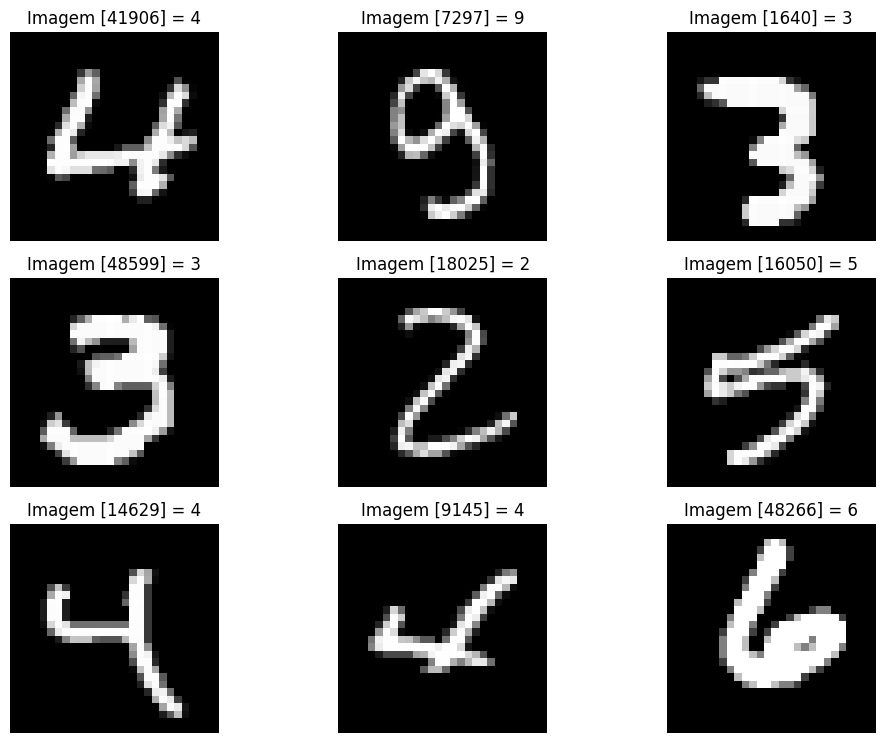

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts): # Função que mostra algumas imagens com seus índices
    
    colunas = 3  # Número de colunas de imagens 
    linhas = int(len(images) / colunas) + 1  # Cálculo do número de linhas 
    plt.figure(figsize=(10, 10))  # Definição do tamanho da imagem
    indice = 1  #Definição do índice 
    for x in zip(images, title_texts):  # Correlação de imagens e índices
        imagem = x[0] 
        texto = x[1] 
        plt.subplot(linhas, colunas, indice)  # Adição de um subplot
        plt.axis('off')  # Desativação dos eixos
        plt.imshow(imagem, cmap=plt.cm.gray)  # Exibição da imagem em tons de cinza
        if (texto != ''):
            plt.title(texto, fontsize=12)  # Definição do índice da imagem
        indice += 1
    plt.tight_layout()  # Ajuste do layout para evitar sobreposição de títulos
    plt.show()  # Exibição da figura com as imagens e índices

imagens_display = []  # Lista para armazenar as imagens a serem mostradas  #images_2_show = imagens_display
indices_display = []  # Lista para armazenar os indices das imagens  #titles_2_show = indices_display
# Seleciona aleatoriamente x imagens de treino

for i in range(0, 9):
    r = random.randint(1, 60000)
    imagens_display.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    indices_display.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(imagens_display, indices_display)  # Exibe as imagens selecionadas

Como se verifica, 9 imagens foram selecionadas aleatoriamente, comprovando que o carregamento se procedeu corretamente.

In [3]:
# Informações sobre as imagens do conjunto de dados

print(f"Imagens de treino: {len(X_tot)}")
print(f"Imagens de validação: {len(X_val)}")
image_pixel_x, image_pixel_y = X_tot[0].shape
print(f"Resolução das imagens: {image_pixel_x}x{image_pixel_y}")

Imagens de treino: 60000
Imagens de validação: 10000
Resolução das imagens: 28x28


# 0. Bibliotecas

In [4]:
# Manipulação e análise de dados
import pandas as pd  # Para manipulação de dados tabulares
import numpy as np  # Biblioteca para cálculos matemáticos e manipulação de arrays

# Divisão de dados e busca de hiperparâmetros
from sklearn.model_selection import train_test_split  # Divisão do dataset em treino e teste
from sklearn.model_selection import GridSearchCV  # Busca de hiperparâmetros por validação cruzada

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler  # Padronização de recursos (média 0, desvio padrão 1)

# Modelo de classificação
from sklearn.neural_network import MLPClassifier  # Rede Neural Multi-Layer Perceptron

# Métricas para avaliação do modelo
from sklearn.metrics import classification_report  # Relatório detalhado de classificação
from sklearn.metrics import accuracy_score  # Métrica de acurácia
from sklearn.metrics import roc_curve, roc_auc_score  # Curva ROC e pontuação AUC
from sklearn.metrics import confusion_matrix  # Matriz de confusão

# Visualização de dados e gráficos
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Visualização de dados com estilo aprimorado

# Utilitários diversos
import time  # Biblioteca para medir o tempo de execução do código

# 1. Probabilidade e Estatística

## a) Descubra o número do Dataset associado ao seu Hash.

-- Hash: 137 --

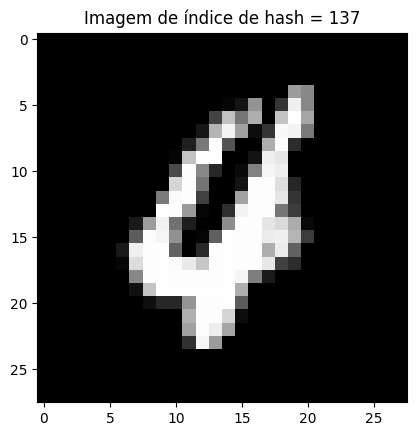

In [5]:
# Índice escolhido
_hash = 137 

# Definição do título para exibição
plt.title(f"Imagem de índice de hash = {_hash}")

# Exibição da imagem com um mapa de cores em escala de cinza
plt.imshow(X_tot[_hash], cmap='gray')

# Exibição da imagem
plt.show()

O número a ser abordado como objeto de estudos em "1. Probabilidade e Estatística" é 4.

In [6]:
classe_alvo = 4

## b) Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem.

In [7]:
# Função para calcular a probabilidade de pixels dentro de um intervalo de intensidade
def calculate_pixel_probability(image, lower_threshold, upper_threshold, image_size):
    
    pixel_count = np.sum((image >= lower_threshold) & (image <= upper_threshold))
    return (pixel_count / image_size) * 100

# Parâmetros da imagem
image_size = image_pixel_x * image_pixel_y  # Número total de pixels

# Calcula a probabilidade de pixels claros
lower_threshold = 128
upper_threshold = 225
probability = calculate_pixel_probability(X_tot[_hash], lower_threshold, upper_threshold, image_size)

# Classe alvo da imagem (se necessário)
classe_alvo = y_tot[_hash]

# Exibe o resultado
print(f"Probabilidade de pixels claros na imagem de índice {_hash} e classe {classe_alvo}: {probability:.2f}%")

Probabilidade de pixels claros na imagem de índice 137 e classe 4: 4.59%


## c) Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [8]:
# Função para encontrar índices de uma classe específica
def find_class_indices(labels, classe_alvo):
    
    # Retorna os índices de todas as amostras pertencentes a uma classe específica
    
    # Parâmetros:
    # - labels: np.array, vetor com as classes das amostras
    # - target_class: int, classe alvo a ser encontrada
    
    # Retorno:
    # - np.array, índices das amostras pertencentes à classe alvo
    
    return np.where(labels == classe_alvo)[0]

# Função para calcular a probabilidade de pixels em um intervalo
def calculate_pixel_probability_for_class(images, lower_threshold, upper_threshold):
    
    # Calcula a probabilidade de pixels em um intervalo específico em todas as imagens de uma classe
    
    # Parâmetros:
    # - images: np.array, conjunto de imagens (formato: N x H x W)
    # - lower_threshold: int, limite inferior do intervalo
    # - upper_threshold: int, limite superior do intervalo
    
    # Retorno:
    # - float, probabilidade de pixels no intervalo especificado
    
    total_pixels = images.size
    bright_pixels = np.sum((images >= lower_threshold) & (images <= upper_threshold))
    return (bright_pixels / total_pixels) * 100

# Seleção dos índices e das imagens da classe alvo
class_indices = find_class_indices(y_tot, classe_alvo)
selected_images = X_tot[class_indices]

# Cálculo da probabilidade
probability = calculate_pixel_probability_for_class(selected_images, lower_threshold, upper_threshold)

# Exibição do resultado
print(f"Probabilidade de pixels claros nas imagens de classe {classe_alvo}: {probability:.2f}%")

Probabilidade de pixels claros nas imagens de classe 4: 4.06%


# 2. Análise Exploratória de Dados e e Pré-processamento

## a) Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

Todos os dígitos aparecem a mesma quantidade?

Qual o valor médio dos píxeis de cada dígito?

Classe 0:
 - Quantidade de imagens: 5920
 - Intensidade média de pixels: 44.2282

Classe 1:
 - Quantidade de imagens: 6725
 - Intensidade média de pixels: 19.4027

Classe 2:
 - Quantidade de imagens: 6023
 - Intensidade média de pixels: 38.0212

Classe 3:
 - Quantidade de imagens: 6107
 - Intensidade média de pixels: 36.2322

Classe 4:
 - Quantidade de imagens: 5918
 - Intensidade média de pixels: 31.0416

Classe 5:
 - Quantidade de imagens: 5376
 - Intensidade média de pixels: 32.9240

Classe 6:
 - Quantidade de imagens: 5915
 - Intensidade média de pixels: 35.2435

Classe 7:
 - Quantidade de imagens: 6238
 - Intensidade média de pixels: 29.2555

Classe 8:
 - Quantidade de imagens: 5856
 - Intensidade média de pixels: 38.4030

Classe 9:
 - Quantidade de imagens: 5922
 - Intensidade média de pixels: 31.3396



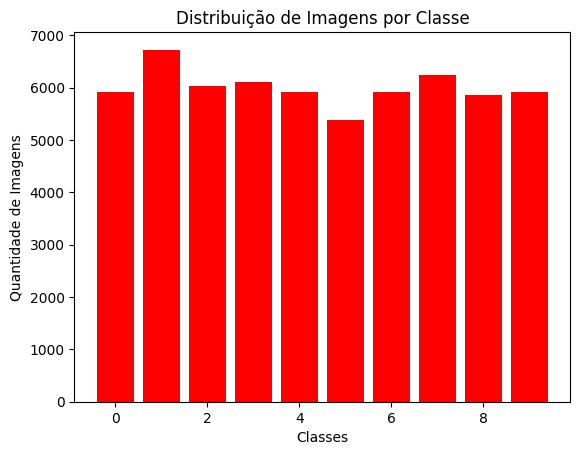

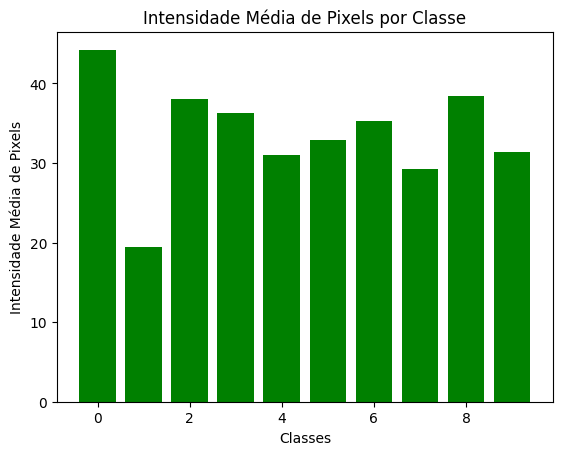

In [9]:
# Função para calcular a quantidade de imagens por classe
def calculate_class_distribution(labels, num_classes=10):
    
    # Calcula a quantidade de amostras para cada classe
    
    # Parâmetros:
    # - labels: np.array, vetor de rótulos
    # - num_classes: int, número total de classes
    
    # Retorno:
    # - list, quantidades de amostras por classe
    
    return [np.sum(labels == i) for i in range(num_classes)]

# Função para calcular a intensidade média de pixels por classe
def calculate_mean_pixel_intensity(images, labels, num_classes=10):
    
    # Calcula a intensidade média dos pixels para cada classe
    
    # Parâmetros:
    # - images: np.array, conjunto de imagens (formato: N x H x W)
    # - labels: np.array, vetor de rótulos
    # - num_classes: int, número total de classes
    
    # Retorno:
    # - list, intensidades médias por classe
    
    return [np.mean(images[labels == i]) for i in range(num_classes)]

# Número de classes e parâmetros da base de dados
num_classes = 10

# Calcula a quantidade de imagens e a intensidade média por classe
class_distribution = calculate_class_distribution(y_tot, num_classes)
mean_pixel_intensity = calculate_mean_pixel_intensity(X_tot, y_tot, num_classes)

# Exibe os resultados em texto
for i in range(num_classes):
    print(f"Classe {i}:")
    print(f" - Quantidade de imagens: {class_distribution[i]}")
    print(f" - Intensidade média de pixels: {mean_pixel_intensity[i]:.4f}\n")

# Gráfico de quantidade de imagens por classe
plt.bar(range(num_classes), class_distribution, color='red')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Distribuição de Imagens por Classe')
plt.show()

# Gráfico de intensidade média de pixels por classe
plt.bar(range(num_classes), mean_pixel_intensity, color='green')
plt.xlabel('Classes')
plt.ylabel('Intensidade Média de Pixels')
plt.title('Intensidade Média de Pixels por Classe')
plt.show()

### Resposta 1:
Os dígitos não aparecem na mesma quantidade. Há variação no número de imagens associadas a cada dígito, conforme os resultados fornecidos:

Menor quantidade: Dígito 5, com 5376 imagens.
Maior quantidade: Dígito 1, com 6725 imagens.
Essa discrepância pode indicar um desbalanceamento no conjunto de dados, o que pode impactar o treinamento e a avaliação de modelos de aprendizado de máquina, especialmente se o modelo não for ajustado para lidar com classes desbalanceadas.


### Resposta 2:
Os valores médios de intensidade dos pixels para cada dígito estão listados abaixo:

Dígito	Intensidade Média de Pixels
0	    44.2282
1	    19.4027
2	    38.0212
3	    36.2322
4	    31.0416
5	    32.9240
6	    35.2435
7	    29.2555
8	    38.4030
9	    31.3396
Os valores mostram que os dígitos têm intensidades médias diferentes, com:

Maior intensidade média: Dígito 0, com 44.2282.
Menor intensidade média: Dígito 1, com 19.4027.

### Análise adicional:
- Impacto das diferenças de quantidade: O desbalanceamento entre as classes pode fazer com que modelos de aprendizado de máquina priorizem as classes mais representadas (como o dígito 1) em detrimento das menos representadas (como o dígito 5).

- Impacto das intensidades médias: Diferenças nas intensidades médias podem refletir variações no contraste ou na representatividade visual dos dígitos. Essas diferenças podem ser relevantes para ajustar pré-processamentos, como normalização ou equalização de histogramas, para melhorar o desempenho do modelo.

## b) Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?

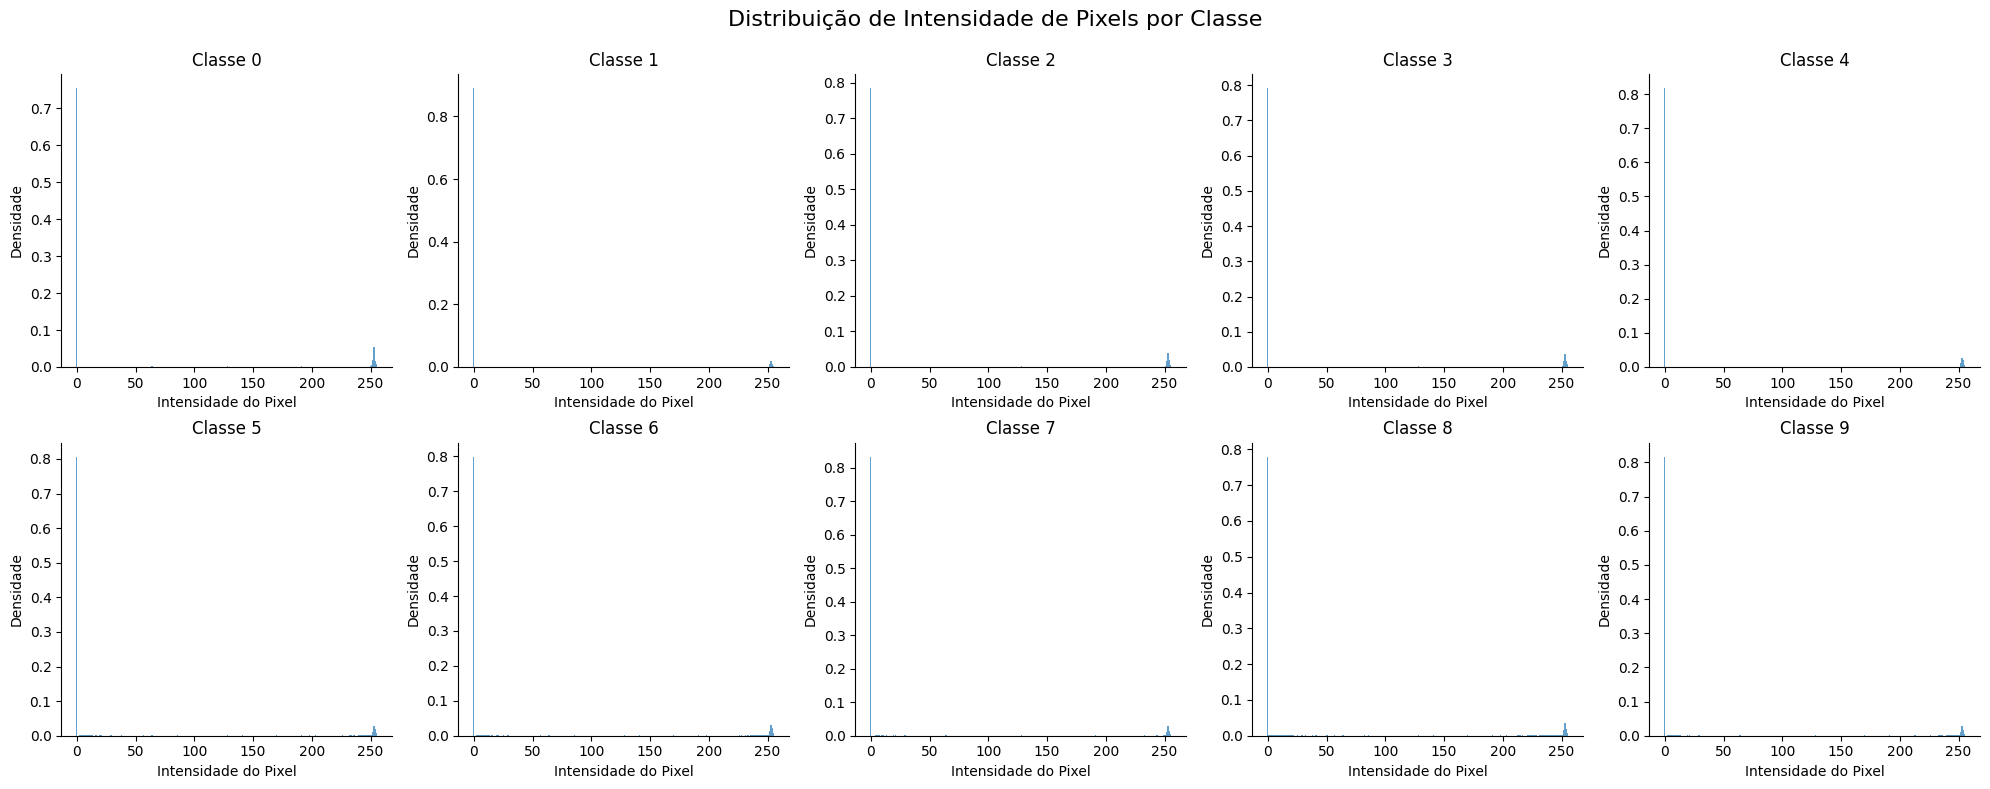

In [10]:
# Função para calcular a distribuição de intensidade de pixels
def calculate_pixel_distribution(image: np.ndarray) -> np.ndarray:
    """
    Calcula a distribuição de intensidade de pixels para uma imagem.
    """
    # np.bincount conta a quantidade de ocorrências de cada valor (0 a 255)
    dist = np.bincount(image.ravel(), minlength=256)
    return dist

# Função para encontrar todos os índices de uma classe específica
def find_all_indexes(labels: np.ndarray, target_class: int) -> np.ndarray:
    """
    Retorna os índices de todas as ocorrências de uma classe específica em um array.
    """
    return np.where(labels == target_class)[0]

# Parâmetros do experimento
data_amount_per_class = 1000  # Ajuste conforme o tamanho desejado

# Inicialização das variáveis para armazenar distribuições e histogramas
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(0, 10):  # Para cada classe de 0 a 9
    # Filtro de índices para a classe 'i' e limitar ao tamanho desejado
    class_indices = find_all_indexes(y_tot, i)[:data_amount_per_class]
    
    # Acúmulo de distribuições de intensidade para todas as imagens da classe
    class_dist = np.zeros(256)
    for idx in class_indices:
        class_dist += calculate_pixel_distribution(X_tot[idx])
    
    # Normalização da distribuição para densidade
    class_dist_density = class_dist / class_dist.sum()
    
    # Exibição de histograma no eixo correspondente
    axes[i].bar(range(256), class_dist_density, width=1, alpha=0.7)
    axes[i].set_title(f"Classe {i}")
    axes[i].set_xlabel("Intensidade do Pixel")
    axes[i].set_ylabel("Densidade")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Ajuste do layout para melhor visualização
plt.tight_layout()
plt.suptitle("Distribuição de Intensidade de Pixels por Classe", fontsize=16)
plt.subplots_adjust(top=0.9)  # Ajuste de espaço para o título
plt.show()

### Resposta:
Os valores "apagados" são frequentes, mas há variações suficientes para distinguir os dígitos. Essa observação pode indicar a necessidade de normalização ou técnicas de pré-processamento para melhorar a qualidade dos dados para tarefas de classificação.


## c) Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

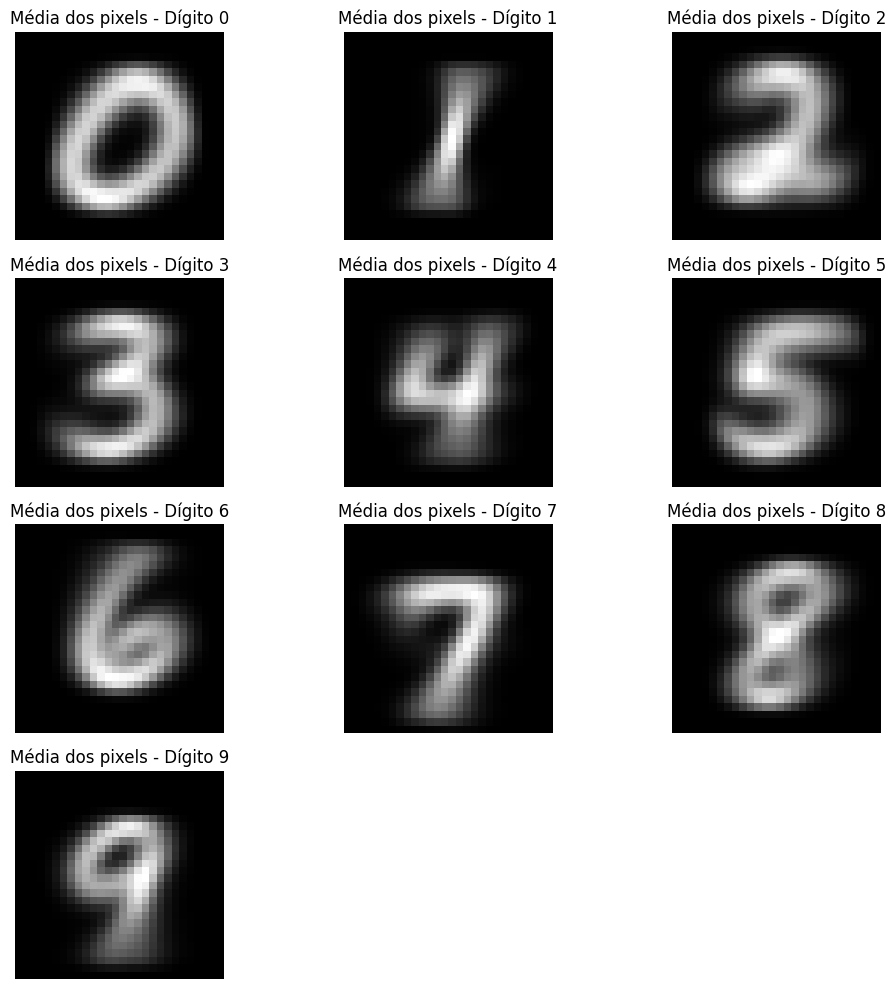

In [11]:
# Lista para armazenar imagens médias e títulos
average_images = []
titles = []

# Cálculo da média dos dígitos para cada classe
for i in range(10):
    # Cálculo da média das imagens de cada classe (média por pixel)
    mean_image = np.mean(X_tot[y_tot == i], axis=0)
    
    # Adição da imagem média à lista
    average_images.append(mean_image)
    titles.append(f"Média dos pixels - Dígito {i}")

# Exibição as imagens médias
show_images(average_images, titles)

### Resposta:
Os digitos são reconhecidos com facilidade, apesar de que as pontas dos digitos aparecem de forma borrada.


# 3. Treinamento e Teste de Modelos

## a) Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca scikit-learn:

* Input Layer: 784 entradas (28x28);
* Hidden Layer 1: 8 neurônios;
* Hidden Layer 2: 8 neurônios;
* Output Layer: 10 saídas; (Classificador 0-9)
* Treine com 10 épocas.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/10 - Loss: 1.2146, Train Accuracy: 0.8227, Test Accuracy: 0.8228
Epoch 2/10 - Loss: 0.5457, Train Accuracy: 0.8649, Test Accuracy: 0.8633
Epoch 3/10 - Loss: 0.4468, Train Accuracy: 0.8803, Test Accuracy: 0.8782
Epoch 4/10 - Loss: 0.4031, Train Accuracy: 0.8910, Test Accuracy: 0.8882
Epoch 5/10 - Loss: 0.3731, Train Accuracy: 0.8972, Test Accuracy: 0.8944
Epoch 6/10 - Loss: 0.3503, Train Accuracy: 0.9033, Test Accuracy: 0.8992
Epoch 7/10 - Loss: 0.3325, Train Accuracy: 0.9076, Test Accuracy: 0.9024
Epoch 8/10 - Loss: 0.3180, Train Accuracy: 0.9109, Test Accuracy: 0.9062
Epoch 9/10 - Loss: 0.3057, Train Accuracy: 0.9139, Test Accuracy: 0.9090
Epoch 10/10 - Loss: 0.2949, Train Accuracy: 0.9172, Test Accuracy: 0.9108


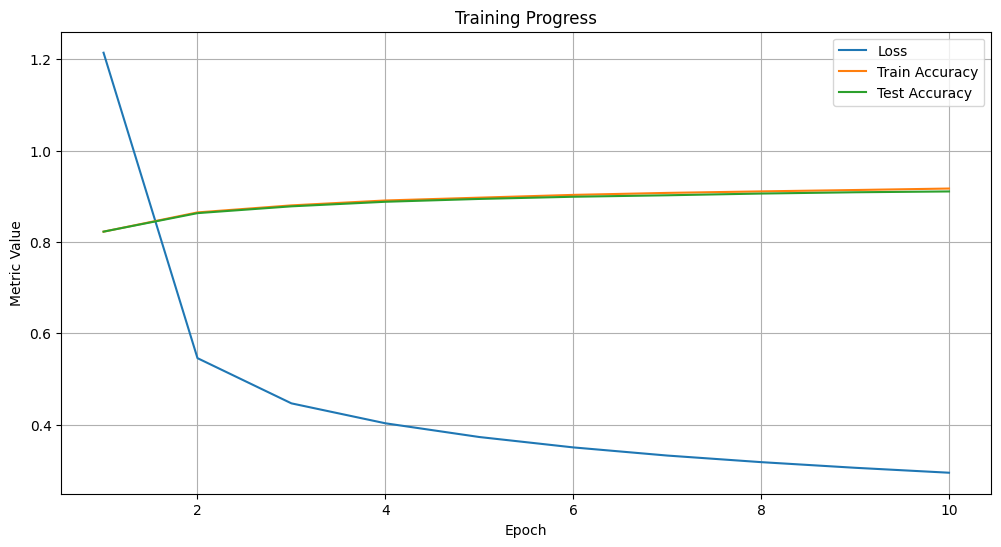

In [12]:
# Pré-processamento dos dados
X_tot_normalized = X_tot.reshape(-1, 28 * 28) / 255  # Normalização para valores entre 0 e 1
X_train, X_test, y_train, y_test = train_test_split(X_tot_normalized, y_tot, test_size=10000, random_state=42)

# Definição do modelo
hidden_layer = (8, 8)
epochs = 10
model1 = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=1, random_state=42, warm_start=True, verbose=False)

# Listas para rastrear métricas
losses, accuracies_train, accuracies_test = [], [], []

# Treinamento por épocas
for epoch in range(epochs):
    model1.fit(X_train, y_train)  # Treina o modelo por 1 época

    # Armazenamento da perda (loss)
    losses.append(model1.loss_)

    # Cálculo e armazenamento de acurácias
    accuracy_train = accuracy_score(y_train, model1.predict(X_train))
    accuracies_train.append(accuracy_train)

    accuracy_test = accuracy_score(y_test, model1.predict(X_test))
    accuracies_test.append(accuracy_test)

    print(f"Epoch {epoch + 1}/{epochs} - Loss: {model1.loss_:.4f}, "
          f"Train Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}")

# Visualização dos resultados
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), losses, label="Loss")
plt.plot(range(1, epochs + 1), accuracies_train, label="Train Accuracy")
plt.plot(range(1, epochs + 1), accuracies_test, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Training Progress")
plt.legend()
plt.grid()
plt.show()

## b) Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca scikit-learn.

* Input Layer: 784 entradas (28x28);
* Hidden Layer 1: 256 neurônios;
* Hidden Layer 2: 256 neurônios;
* Hidden Layer 3: 256 neurônios;
* Hidden Layer 4: 256 neurônios;
* Output Layer: 10 saídas; (Classificação 0-9)
* Treine com 20 épocas.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/20 - Loss: 0.3086, Train Accuracy: 96.52%, Test Accuracy: 95.64%
Epoch 2/20 - Loss: 0.1177, Train Accuracy: 98.05%, Test Accuracy: 97.17%
Epoch 3/20 - Loss: 0.0770, Train Accuracy: 98.29%, Test Accuracy: 97.03%
Epoch 4/20 - Loss: 0.0578, Train Accuracy: 98.25%, Test Accuracy: 96.86%
Epoch 5/20 - Loss: 0.0470, Train Accuracy: 98.57%, Test Accuracy: 97.05%
Epoch 6/20 - Loss: 0.0394, Train Accuracy: 98.75%, Test Accuracy: 97.21%
Epoch 7/20 - Loss: 0.0321, Train Accuracy: 98.92%, Test Accuracy: 97.21%
Epoch 8/20 - Loss: 0.0290, Train Accuracy: 99.21%, Test Accuracy: 97.33%
Epoch 9/20 - Loss: 0.0253, Train Accuracy: 99.50%, Test Accuracy: 97.53%
Epoch 10/20 - Loss: 0.0235, Train Accuracy: 99.53%, Test Accuracy: 97.74%
Epoch 11/20 - Loss: 0.0243, Train Accuracy: 99.56%, Test Accuracy: 97.90%
Epoch 12/20 - Loss: 0.0209, Train Accuracy: 99.25%, Test Accuracy: 97.44%
Epoch 13/20 - Loss: 0.0186, Train Accuracy: 99.49%, Test Accuracy: 97.61%
Epoch 14/20 - Loss: 0.0198, Train Accuracy: 99.

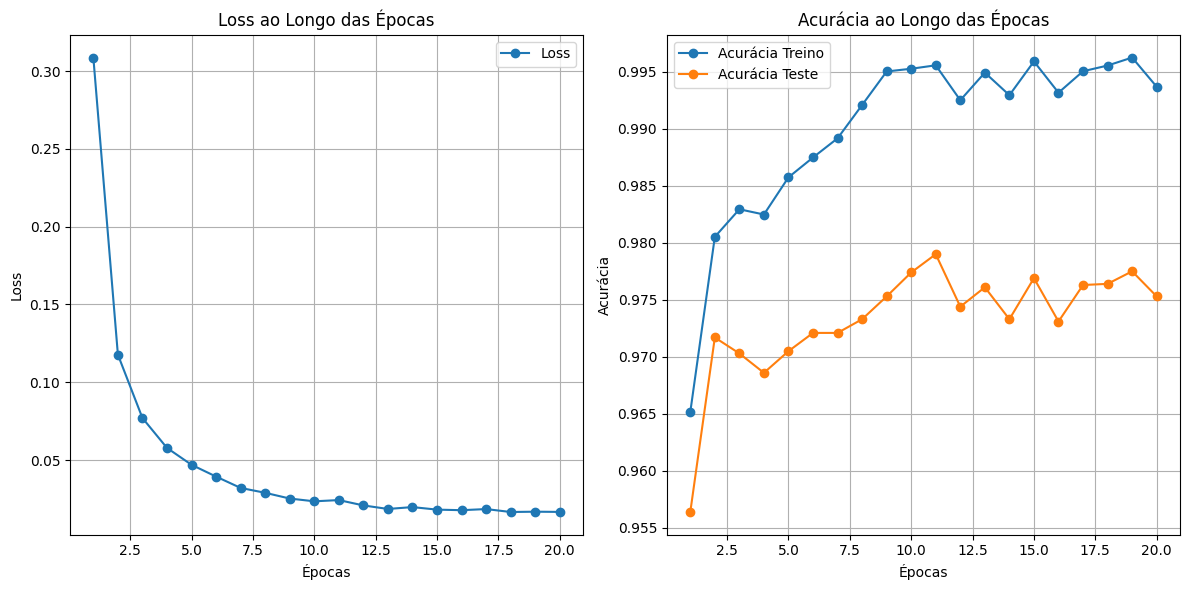

In [13]:
# Configuração dos parâmetros
hidden_layer = (256, 256, 256, 256)  # Arquitetura com 4 camadas ocultas de 256 neurônios cada
epochs = 20  # Número de épocas

# Criação do modelo com treinamento incremental
model2 = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=1, random_state=137, warm_start=True, verbose=False)

# Função para rastrear o desempenho ao longo das épocas
def tracking_epochs(model2, X_train, y_train, X_test, y_test, epochs):
    losses, accuracies_train, accuracies_test = [], [], []

    for epoch in range(epochs):
        model2.fit(X_train, y_train)  # Treina o modelo para 1 época

        # Cálculo e registro da perda
        losses.append(model2.loss_)

        # Acurácia no conjunto de treino
        y_pred_train = model2.predict(X_train)
        accuracies_train.append(accuracy_score(y_train, y_pred_train))

        # Acurácia no conjunto de teste
        y_pred_test = model2.predict(X_test)
        accuracies_test.append(accuracy_score(y_test, y_pred_test))

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {model2.loss_:.4f}, "
              f"Train Accuracy: {accuracies_train[-1]*100:.2f}%, "
              f"Test Accuracy: {accuracies_test[-1]*100:.2f}%")

    return losses, accuracies_train, accuracies_test

# Treinamento e rastreamento
losses, accuracies_train, accuracies_test = tracking_epochs(model2, X_train, y_train, X_test, y_test, epochs)

# Visualização dos resultados
plt.figure(figsize=(12, 6))

# Perda
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, marker='o', label='Loss')
plt.title('Loss ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies_train, marker='o', label='Acurácia Treino')
plt.plot(range(1, epochs + 1), accuracies_test, marker='o', label='Acurácia Teste')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## c) Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre [8, 8] e [256, 256, 256, 256].

Utilize a função GridSearchCV para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py

O melhor modelo foi o (256, 256, 128), obtendo uma acurácia de 97.53%
A acurácia final nos dados de treino foi de 99.58%
A acurácia final nos dados de teste foi de 97.58%


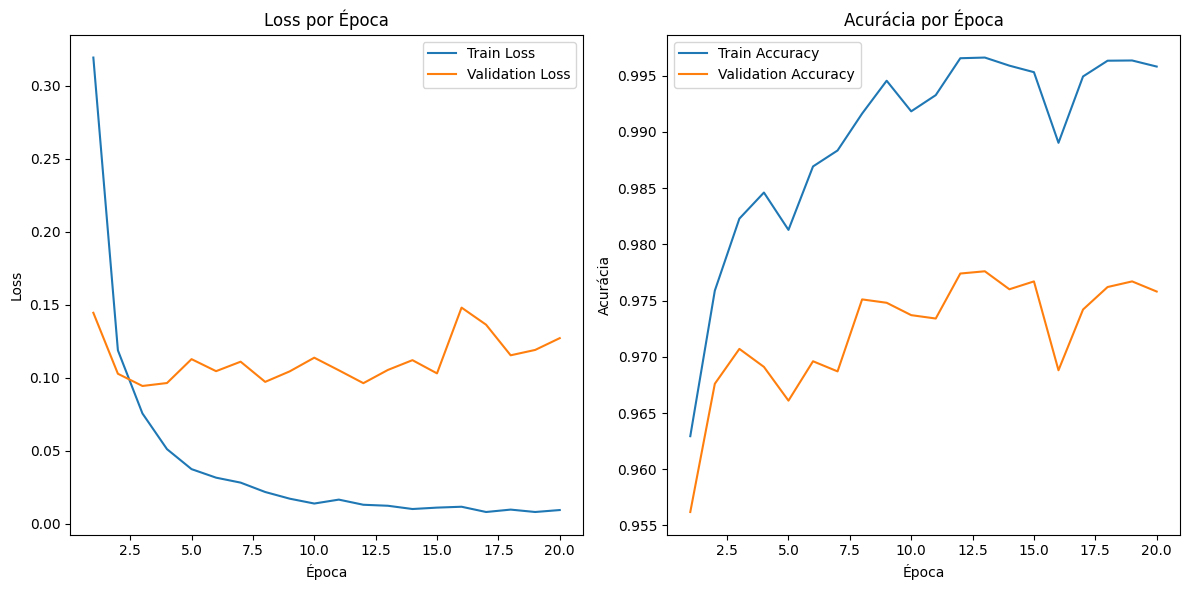

In [14]:
# Inclusão de log_loss
from sklearn.metrics import accuracy_score, log_loss

# Parâmetros para GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(256, 128, 256, 128), (256, 64, 32, 8), (256, 256, 128), (256, 128, 64), (16, 8)],
    'max_iter': [15]
}

# Configuração do modelo inicial e busca pelos melhores hiperparâmetros
model = MLPClassifier(random_state=137)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados do GridSearchCV
best_params = grid_search.best_params_
best_layer = best_params["hidden_layer_sizes"]
best_score = grid_search.best_score_

print(f"O melhor modelo foi o {best_layer}, obtendo uma acurácia de {best_score*100:.2f}%")

# Configuração do modelo final com os melhores hiperparâmetros
model3 = MLPClassifier(hidden_layer_sizes=best_layer, max_iter=1, warm_start=True, random_state=137)

# Inicialização das listas de métricas
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# Treinamento incremental por 20 épocas
for epoch in range(20):
    model3.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Cálculo das métricas de treino
    pred_train = model3.predict(X_train)
    train_losses.append(model3.loss_)
    train_accs.append(accuracy_score(y_train, pred_train))
    
    # Cálculo das métricas de validação
    pred_val_proba = model3.predict_proba(X_test)
    val_losses.append(log_loss(y_test, pred_val_proba, labels=np.unique(y_train)))
    val_accs.append(accuracy_score(y_test, np.argmax(pred_val_proba, axis=1)))

# Resultados finais
print(f"A acurácia final nos dados de treino foi de {train_accs[-1]*100:.2f}%")
print(f"A acurácia final nos dados de teste foi de {val_accs[-1]*100:.2f}%")

# Plotagem dos gráficos
epochs = range(1, 21)

plt.figure(figsize=(12, 6))
# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.title("Loss por Época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, label="Train Accuracy")
plt.plot(epochs, val_accs, label="Validation Accuracy")
plt.title("Acurácia por Época")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()

plt.tight_layout()
plt.show()

## d) Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam underfitting ou overfitting. Justifique com gráficos e análises.

--- ANN1 ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       997
           1       0.95      0.96      0.95      1158
           2       0.90      0.89      0.89      1007
           3       0.94      0.82      0.87      1028
           4       0.90      0.94      0.92       966
           5       0.88      0.85      0.86       885
           6       0.92      0.96      0.94       945
           7       0.94      0.93      0.93      1070
           8       0.84      0.90      0.87       988
           9       0.90      0.89      0.90       956

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



--- ANN2 ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       997
           1       0.99      0.98      0.99      1158
           2       0.97      0.98      0.98      1

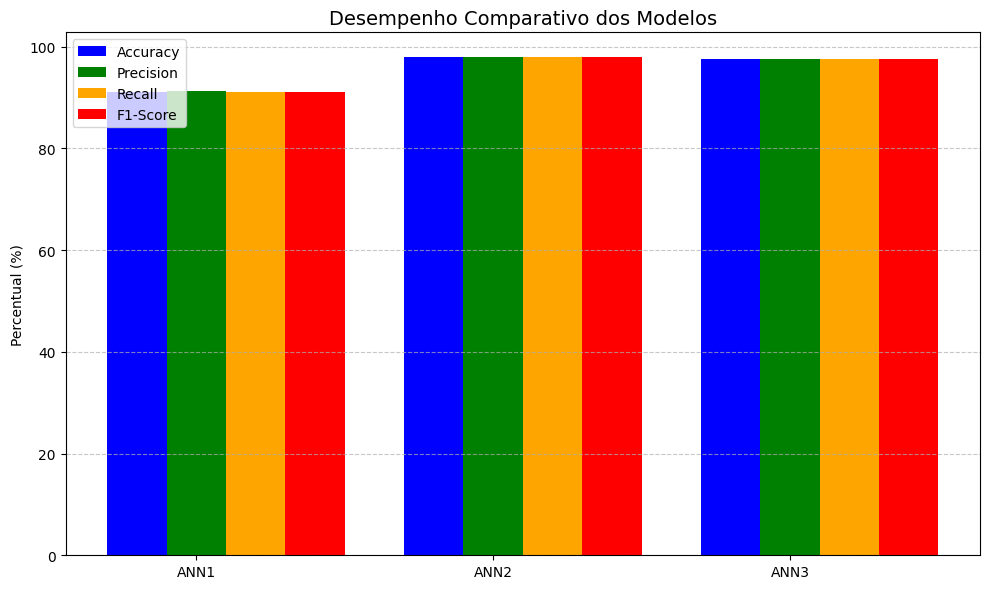

Análise do ANN1:
- Accuracy: 91.15%
- Precision: 91.22%
- Recall: 91.15%
- F1-Score: 91.12%
O ANN1 possui um desempenho balanceado.


Análise do ANN2:
- Accuracy: 97.89%
- Precision: 97.90%
- Recall: 97.89%
- F1-Score: 97.89%
O ANN2 possui um desempenho balanceado.


Análise do ANN3:
- Accuracy: 97.57%
- Precision: 97.58%
- Recall: 97.57%
- F1-Score: 97.57%
O ANN3 possui um desempenho balanceado.




In [15]:
# Inclusão de precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Teste dos três modelos
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Previsões dos modelos
prediction_test_1 = model1.predict(X_test)
prediction_test_2 = model2.predict(X_test)
prediction_test_3 = model3.predict(X_test)

# Com as predições já foram feitas
predictions = [prediction_test_1, prediction_test_2, prediction_test_3]
model_names = ["ANN1", "ANN2", "ANN3"]

# Armazenar métricas em um dicionário
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Calcular métricas para cada modelo
for i, pred in enumerate(predictions):
    metrics["Model"].append(model_names[i])
    metrics["Accuracy"].append(accuracy_score(y_test, pred) * 100)
    metrics["Precision"].append(precision_score(y_test, pred, average='weighted') * 100)
    metrics["Recall"].append(recall_score(y_test, pred, average='weighted') * 100)
    metrics["F1-Score"].append(f1_score(y_test, pred, average='weighted') * 100)
    
    print(f"--- {model_names[i]} ---")
    print(classification_report(y_test, pred))
    print("\n")

# Visualizar os resultados com gráficos
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Criar barras para cada métrica
ax.bar(x - width, metrics["Accuracy"], width, label="Accuracy", color="blue")
ax.bar(x, metrics["Precision"], width, label="Precision", color="green")
ax.bar(x + width, metrics["Recall"], width, label="Recall", color="orange")
ax.bar(x + 2 * width, metrics["F1-Score"], width, label="F1-Score", color="red")

# Configurações do gráfico
ax.set_title("Desempenho Comparativo dos Modelos", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylabel("Percentual (%)")
ax.legend(loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Análise textual
for i in range(len(model_names)):
    print(f"Análise do {model_names[i]}:")
    print(f"- Accuracy: {metrics['Accuracy'][i]:.2f}%")
    print(f"- Precision: {metrics['Precision'][i]:.2f}%")
    print(f"- Recall: {metrics['Recall'][i]:.2f}%")
    print(f"- F1-Score: {metrics['F1-Score'][i]:.2f}%")
    if metrics['Accuracy'][i] < 90:
        print(f"O {model_names[i]} apresenta underfitting, possivelmente devido a arquitetura simples.")
    elif metrics['Accuracy'][i] > 99 and metrics['Precision'][i] < metrics['Recall'][i]:
        print(f"O {model_names[i]} apresenta sinais de overfitting, mas ainda generaliza bem.")
    else:
        print(f"O {model_names[i]} possui um desempenho balanceado.")
    print("\n")

### Resposta:
1. Modelo ANN1
Desempenho:
Accuracy: 91.15%
F1-Score: 91.12%
A precisão, recall e F1-Score são consistentes, indicando um modelo que generaliza razoavelmente bem.
Análise:
Embora o desempenho seja bom, a accuracy abaixo de 95% sugere que o ANN1 pode estar subestimando a complexidade do problema, possivelmente devido a uma arquitetura ou treinamento insuficientes.
Alguns dígitos (como 3 e 8) apresentam menor F1-Score, indicando dificuldade em prever corretamente essas classes.
Diagnóstico: O ANN1 apresenta underfitting, já que o modelo não está capturando todas as nuances dos dados, resultando em um desempenho inferior.

2. Modelo ANN2
Desempenho:
Accuracy: 97.89%
F1-Score: 97.89%
As métricas indicam um modelo com desempenho consistente e elevado.
Análise:
O modelo mostra um equilíbrio entre as métricas de desempenho, sem discrepâncias significativas entre precisão e recall.
A alta accuracy sugere que o ANN2 captura bem a complexidade dos dados, sem apresentar sinais claros de overfitting.
Diagnóstico: O ANN2 possui um desempenho balanceado, sem sinais de underfitting ou overfitting.

3. Modelo ANN3
Desempenho:
Accuracy: 97.57%
F1-Score: 97.57%
Similar ao ANN2, o ANN3 apresenta métricas consistentes e altas.
Análise:
Embora o desempenho seja ligeiramente inferior ao do ANN2, ainda está bem acima do ANN1.
A diferença marginal nas métricas indica um bom ajuste do modelo à complexidade do problema.
Diagnóstico: O ANN3 também possui um desempenho balanceado, similar ao ANN2.


4. Conclusão
ANN1: Apresenta underfitting, indicando que o modelo é simplista ou insuficientemente treinado.
ANN2 e ANN3: Possuem desempenho similar e balanceado, sendo adequados para o problema.
O ANN2 é o melhor modelo, dado seu ligeiramente melhor desempenho, especialmente na accuracy. Sugere-se revisar a arquitetura do ANN1 para mitigar o underfitting, possivelmente adicionando mais camadas ou ajustando hiperparâmetros.

# 4. Resultados e Visualizações

## a) Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

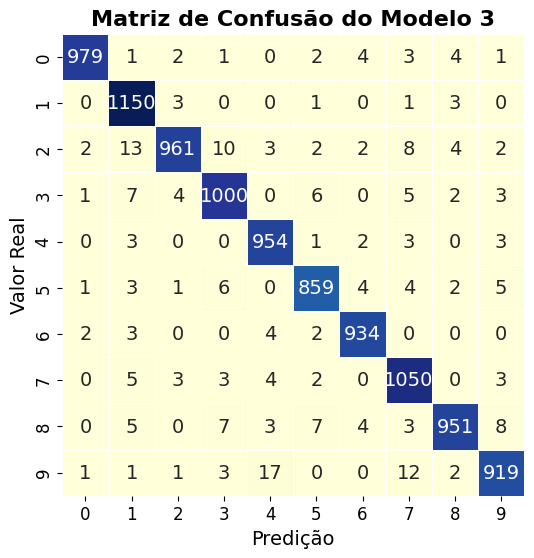

Relatório de Classificação do Modelo 3:
              precision    recall  f1-score   support

           0     0.9929    0.9819    0.9874       997
           1     0.9656    0.9931    0.9791      1158
           2     0.9856    0.9543    0.9697      1007
           3     0.9709    0.9728    0.9718      1028
           4     0.9685    0.9876    0.9780       966
           5     0.9739    0.9706    0.9723       885
           6     0.9832    0.9884    0.9858       945
           7     0.9642    0.9813    0.9727      1070
           8     0.9824    0.9626    0.9724       988
           9     0.9735    0.9613    0.9674       956

    accuracy                         0.9757     10000
   macro avg     0.9761    0.9754    0.9756     10000
weighted avg     0.9758    0.9757    0.9757     10000



In [16]:
# Previsões com o modelo escolhido
y_pred = model3.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurações para o Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            annot_kws={"size": 14}, linewidths=0.5, square=True)

# Adição de títulos e labels
plt.title("Matriz de Confusão do Modelo 3", fontsize=16, weight='bold')
plt.xlabel("Predição", fontsize=14)
plt.ylabel("Valor Real", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Exibição do relatório de classificação
report = classification_report(y_test, y_pred, digits=4)
print("Relatório de Classificação do Modelo 3:")
print(report)

## b) Exiba gráficos que mostram a evolução da acurácia e da perda (Loss) durante o treinamento do melhor modelo encontrado no item 3c).

/tmp/ipykernel_51/3947756575.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


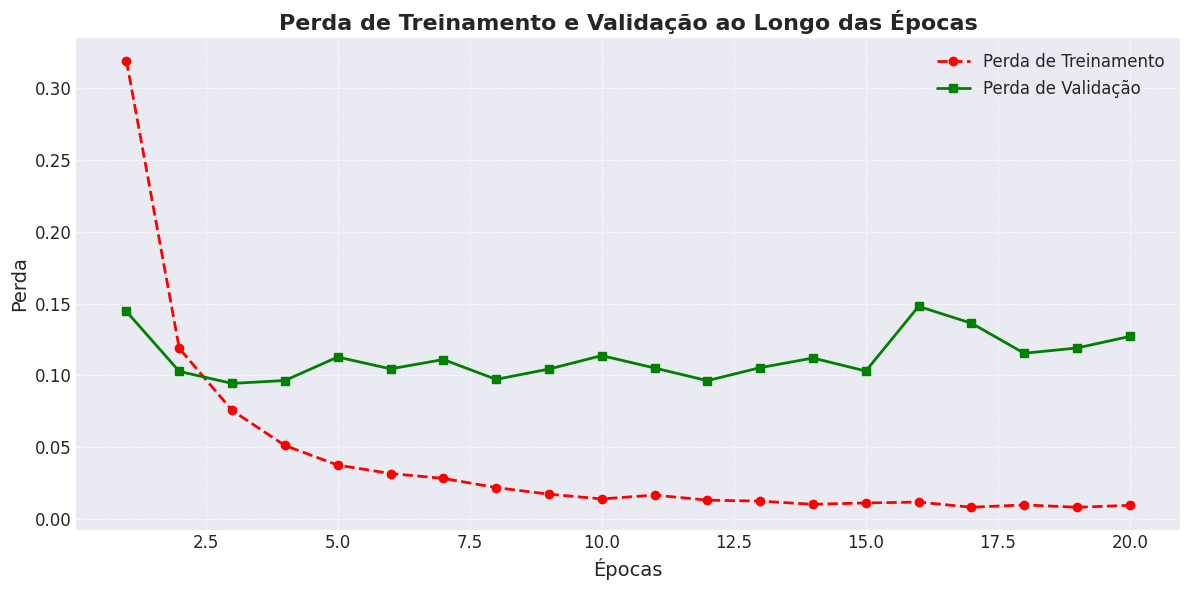

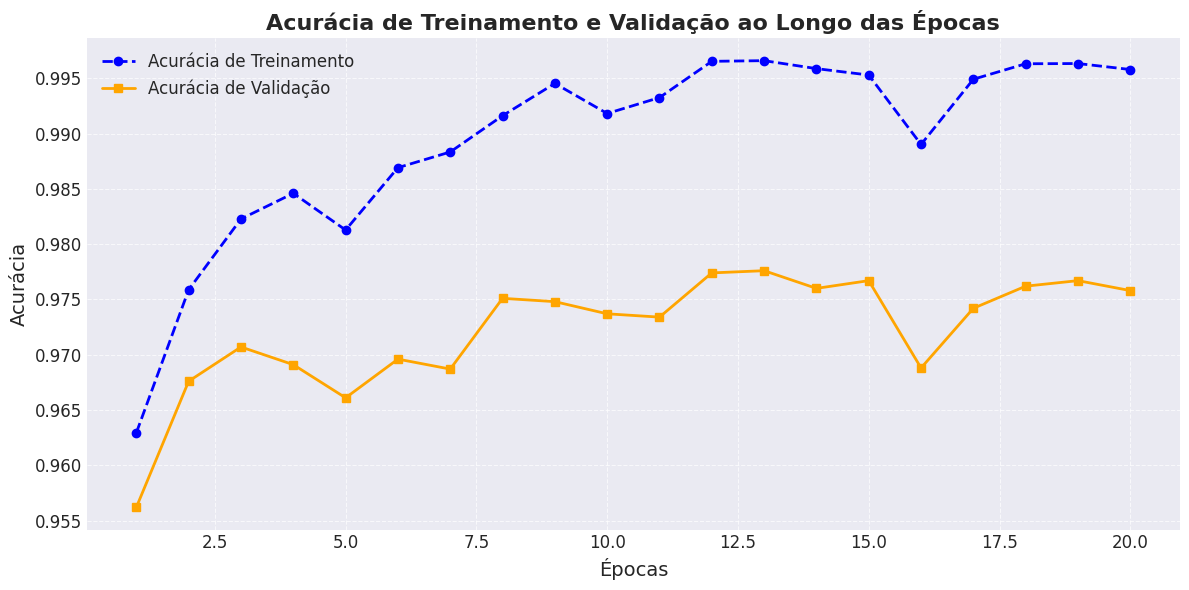

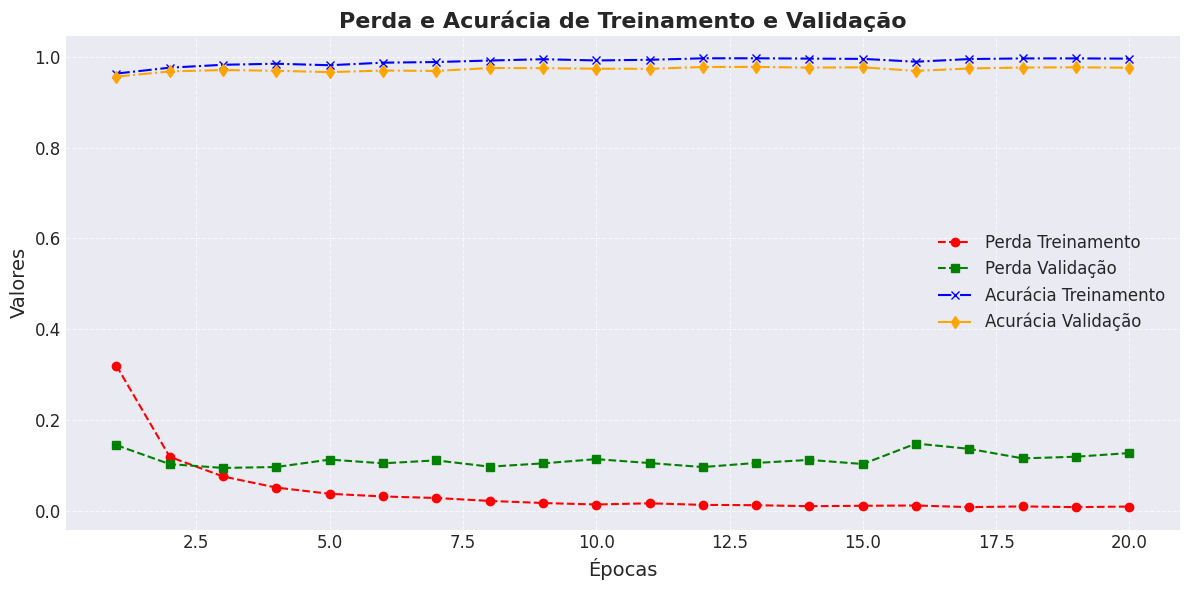

In [17]:
epochs = range(1, len(train_losses) + 1)

# Configurações de estilo para consistência visual
plt.style.use('seaborn-darkgrid')

# Figura 1: Perda (Loss) de Treinamento e Validação
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label='Perda de Treinamento', color='red', marker='o', linestyle='--', linewidth=2)
plt.plot(epochs, val_losses, label='Perda de Validação', color='green', marker='s', linestyle='-', linewidth=2)

plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.title('Perda de Treinamento e Validação ao Longo das Épocas', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Figura 2: Acurácia (Accuracy) de Treinamento e Validação
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accs, label='Acurácia de Treinamento', color='blue', marker='o', linestyle='--', linewidth=2)
plt.plot(epochs, val_accs, label='Acurácia de Validação', color='orange', marker='s', linestyle='-', linewidth=2)

plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.title('Acurácia de Treinamento e Validação ao Longo das Épocas', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Figura 3: Combinação de Loss e Acurácia (opcional)
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label="Perda Treinamento", linestyle="--", marker="o", color='red')
plt.plot(epochs, val_losses, label="Perda Validação", linestyle="--", marker="s", color='green')
plt.plot(epochs, train_accs, label="Acurácia Treinamento", linestyle="-.", marker="x", color='blue')
plt.plot(epochs, val_accs, label="Acurácia Validação", linestyle="-.", marker="d", color='orange')

plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.title("Perda e Acurácia de Treinamento e Validação", fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## c) Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

Loading BokehJS ...

Exibindo acertos:


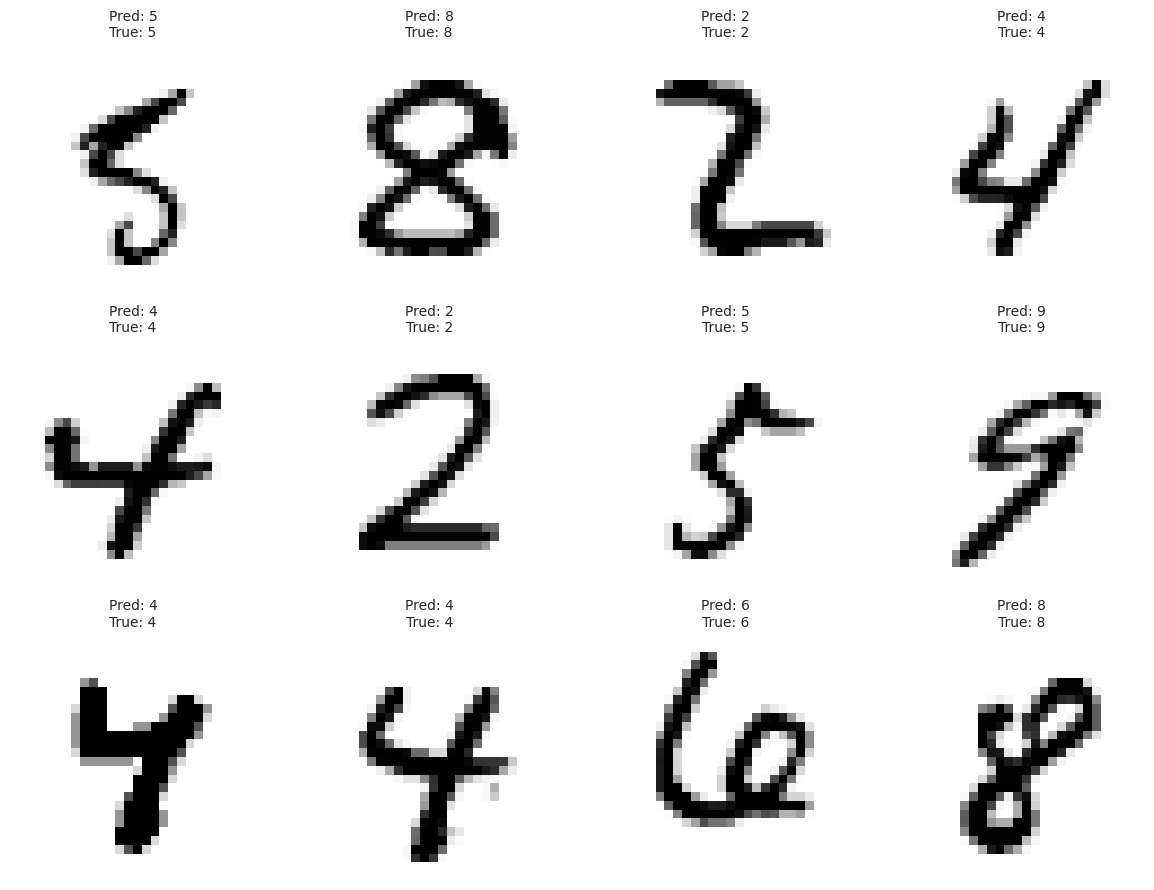

Exibindo erros:


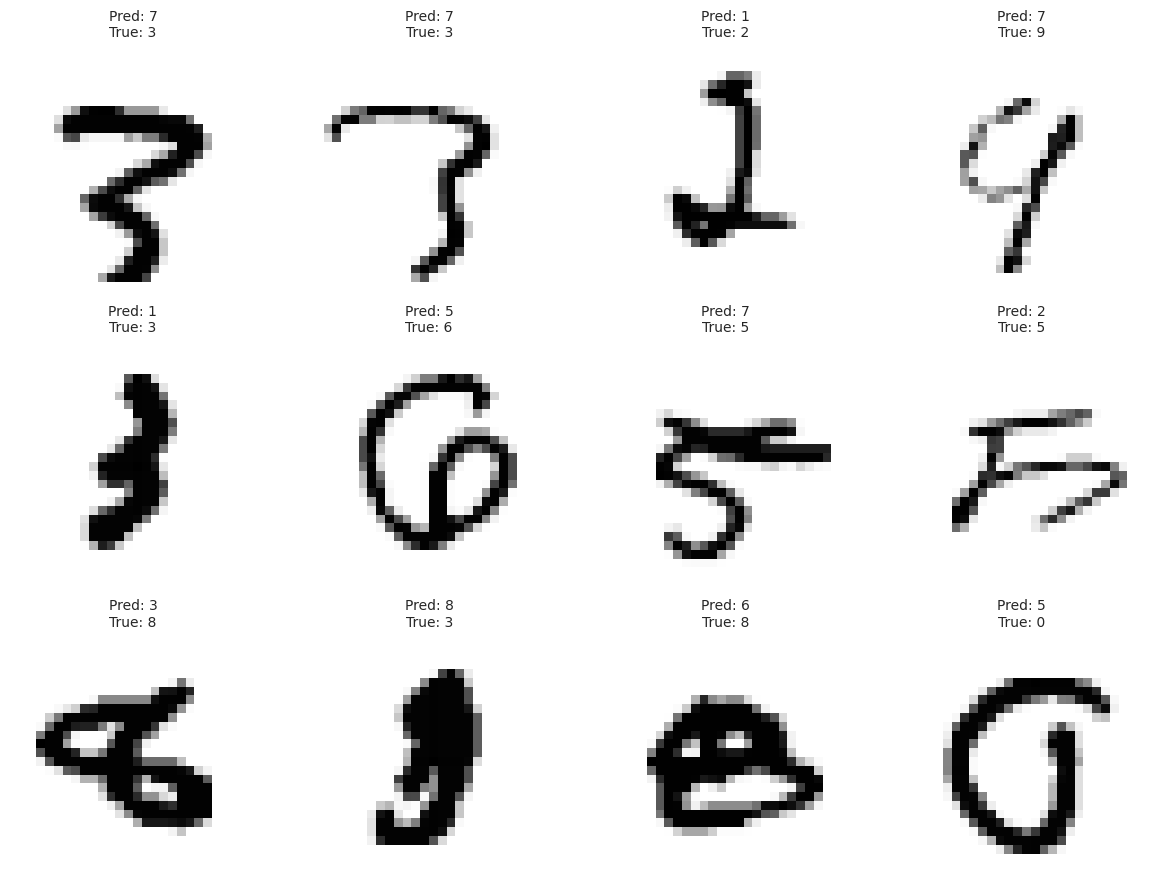

In [18]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column

# Reconstrução do X_test em imagens
X_test_images = X_test.reshape(X_test.shape[0], 28, 28)

# Função para exibir imagens de forma interativa
def display_interactive_images(images, num_images=1000):
    output_notebook()
    
    # Limitação do número de imagens para evitar sobrecarregar o notebook
    images = images[:num_images]
    source = ColumnDataSource(data={'image': [images[0]]})
    
    # Configuração do gráfico interativo
    plot = figure(x_range=(0, 28), y_range=(28, 0), width=400, height=400)
    plot.image('image', source=source, x=0, y=0, dw=28, dh=28, palette="Greys256")
    plot.title.text = "Gráfico Interativo: Dataset MNIST"
    
    # Slider para selecionar a imagem
    slider = Slider(start=0, end=num_images - 1, value=0, step=1, title="Índice da Imagem")
    slider.js_on_change("value", CustomJS(args=dict(source=source, images=images), code="""
        const idx = cb_obj.value;
        source.data = {image: [images[idx]]};
        source.change.emit();
    """))
    
    # Layout e exibição
    layout = column(slider, plot)
    show(layout)

# Exibição de imagens interativamente
display_interactive_images(X_test_images)

# Função para exibir erros e acertos
def display_classification_results(X_images, y_true, y_pred, max_images=12):
    # Separação de acertos e erros
    correct_indices = np.where(y_true == y_pred)[0]
    incorrect_indices = np.where(y_true != y_pred)[0]
    
    # Acertos
    X_correct = X_images[correct_indices]
    y_correct_true = y_true[correct_indices]
    y_correct_pred = y_pred[correct_indices]
    
    # Erros
    X_incorrect = X_images[incorrect_indices]
    y_incorrect_true = y_true[incorrect_indices]
    y_incorrect_pred = y_pred[incorrect_indices]
    
    # Função auxiliar para mostrar imagens
    def show_images(images, titles, cols=4):
        rows = (len(images) + cols - 1) // cols
        plt.figure(figsize=(12, rows * 3))
        for i, (img, title) in enumerate(zip(images, titles)):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img, cmap='Greys')
            plt.axis('off')
            plt.title(title, fontsize=10)
        plt.tight_layout()
        plt.show()
    
    # Exibição dos acertos
    print("Exibindo acertos:")
    correct_titles = [f"Pred: {y_correct_pred[i]}\nTrue: {y_correct_true[i]}" for i in range(min(max_images, len(X_correct)))]
    show_images(X_correct[:max_images], correct_titles)
    
    # Exibição dos erros
    print("Exibindo erros:")
    incorrect_titles = [f"Pred: {y_incorrect_pred[i]}\nTrue: {y_incorrect_true[i]}" for i in range(min(max_images, len(X_incorrect)))]
    show_images(X_incorrect[:max_images], incorrect_titles)

# Exibição dos resultados de classificação
display_classification_results(X_test_images, y_test, prediction_test_3)

### Resposta:
1. Discussão de Acertos:
Classe bem definida: Os dígitos claros, sem sobreposição ou ruído, são facilmente reconhecidos.
Dígitos com características típicas: Exemplos em que o modelo reconheceu padrões consistentes, como o formato fechado do "0" ou o traço linear do "1".
Razões para o sucesso:
Qualidade da imagem: Intensidades bem distribuídas que seguem padrões aprendidos no treinamento.
Simplicidade do padrão: As imagens exibem características distintas e não apresentam ruído.

3. Discussão de Erros:
Confusão entre dígitos semelhantes:
Exemplo: Um "5" mal desenhado pode ser confundido com um "6".
Razão: Formas parcialmente sobrepostas ou apagadas.
Ruído na imagem: Pixels de baixa intensidade podem causar má interpretação, especialmente em dígitos menos contrastantes.
Imagens com características fora do padrão: Alguns dígitos podem ser escritos de forma incomum, como um "1" com traços adicionais.



# Envio

In [19]:
import pickle

# Configuração do modelo
print("Configurando o modelo...")
X_train = X_tot.reshape(-1, 28 * 28) / 255  # Normalização e reshaping
y_train = y_tot  # Labels correspondentes

# Inicialização e treinamento do modelo
print("Treinando o modelo com MLPClassifier...")
model = MLPClassifier(hidden_layer_sizes=(256, 256, 128), max_iter=20, random_state=137)
model.fit(X_train, y_train)

# Carregando os dados de validação/teste
print("Carregando os dados de validação...")
with open(validation_images_filepath, 'rb') as f:
    X_test = pickle.load(f)

# Preparando os dados de validação
print("Preparando os dados para predição...")
X_test = X_test.reshape(-1, 28 * 28) / 255  # Normalização e reshaping

# Realizando a predição
print("Realizando predições...")
predictions = model.predict(X_test)

# Preparando o arquivo de submissão
print("Criando o arquivo de submissão...")
submission_df = pd.DataFrame({
    'ID': np.arange(1, len(predictions) + 1),  # IDs de 1 a n (tamanho do conjunto de teste)
    'Answer': predictions  # Predições geradas pelo modelo
})

# Ajustando o índice e salvando o arquivo CSV
submission_df.set_index("ID", inplace=True)
submission_filename = 'submission.csv'
submission_df.to_csv(submission_filename)

# Exibindo as primeiras linhas para verificação
print("Primeiras linhas do arquivo de submissão:")
print(submission_df.head())

# Mensagem final
print(f"Submissão salva no arquivo '{submission_filename}'.")

Configurando o modelo...
Treinando o modelo com MLPClassifier...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Carregando os dados de validação...
Preparando os dados para predição...
Realizando predições...
Criando o arquivo de submissão...
Primeiras linhas do arquivo de submissão:
    Answer
ID        
1        8
2        4
3        8
4        7
5        7
Submissão salva no arquivo 'submission.csv'. Não esqueça de publicá-lo na plataforma da competição com o título correto e padronizado.
